In [2]:
import tensorflow as tf 
from tensorflow.python.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
IMG_SIZE = 256
BATCH_SIZE = 64
EPOCHS = 100
CHANNELS = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    shuffle = True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 70295 files belonging to 38 classes.


In [5]:
class_names = dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [6]:
len(dataset)

1099

2023-09-18 20:37:20.430057: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


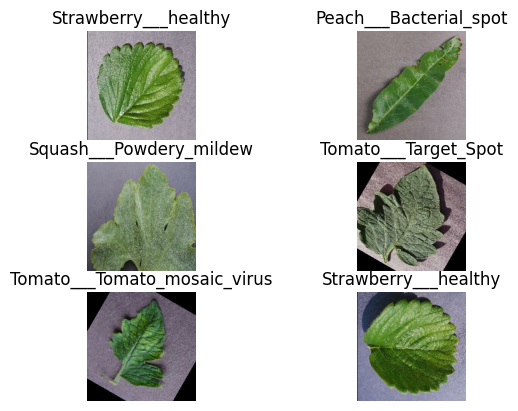

In [7]:
for image, label in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 2, i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [8]:
train_size = 0.8
len(dataset) * train_size

879.2

In [9]:
train_dataset = dataset.take(879)
len(train_dataset)

879

In [10]:
test_dataset = dataset.skip(879)
len(test_dataset)

220

In [11]:
val_size = 0.1
len(dataset) * val_size

109.9

In [12]:
val_dataset = test_dataset.take(109)
len(val_dataset)

109

In [13]:
test_dataset = test_dataset.skip(109)
len(test_dataset)

111

In [14]:
train_dataset = train_dataset.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
resize_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
flip_rotate = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip(mode = "horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_size = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    resize_rescale,
    flip_rotate,
    layers.Conv2D(64, (3,3), activation='relu', input_shape = input_size),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),    
    layers.Conv2D(128, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_size)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (64, 256, 256, 3)         0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (64, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (64, 254, 254, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (64, 127, 127, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (64, 125, 125, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (64, 62, 62, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (64, 60, 60, 128)         1

In [19]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_dataset, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_dataset
)

Epoch 1/100


2023-09-18 20:37:31.766796: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 216 of 10000
2023-09-18 20:37:41.780937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 306 of 10000
2023-09-18 20:37:53.101352: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 377 of 10000


: 